# Case Study 4.2 - 03 Visualise Clusters

We use a simple Matplotlib script to visualise our clusters. The cluster names can be opened from the file topic_labels.csv saved in the previous notebook. The original script used in generating the plot for the book can be found below, as well as an altenrative tabulation of the data.

* [Plot Topic Clusters CaseStudy_4.2_03-03.py](CaseStudy_4.2_03-03.py)
* [Tabulate by Generation Source CaseStudy_4.2_03-0X.py](CaseStudy_4.2_03-0X.py)
  

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches

In [7]:
df = pd.read_csv("data/clustered_data.csv")
tdf = pd.read_csv("data/topic_labels.csv")

In [8]:
topics = tdf.set_index('ID')['Topic Name'].to_dict()

In [9]:
def topic_lookup(t):
    return topics[t]

df['Topic'] = df['cluster'].apply(topic_lookup)

(0.0, 10000.0)

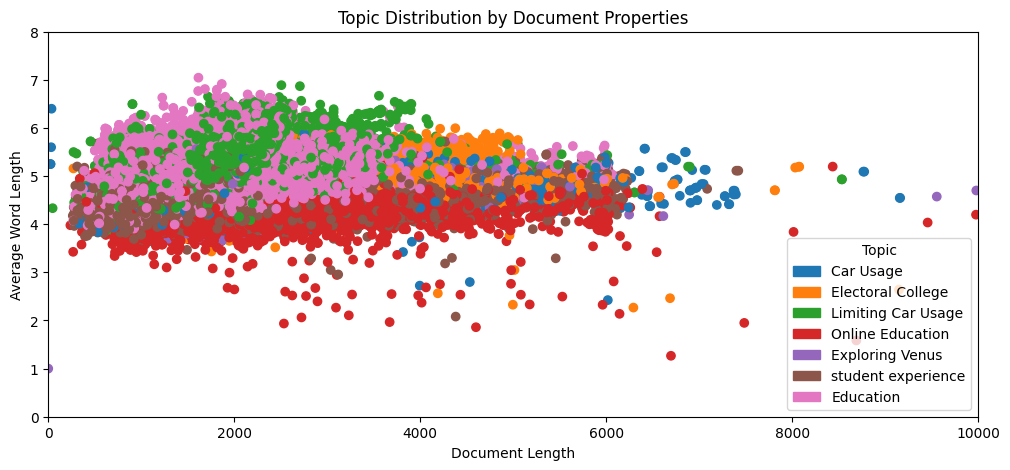

In [14]:
# Now plot, ensure that each cluster has its own colour and the topic names are used in the legend
levels, categories = pd.factorize(df['Topic'])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

plt.rcParams['figure.figsize'] = [12, 5]

plt.scatter(df['text_len'], df['text_avg_wl'], c=colors)
plt.title('Topic Distribution by Document Properties')
plt.xlabel('Document Length')
plt.ylabel('Average Word Length')
plt.legend(handles=handles, title='Topic')
plt.ylim(0, 8)
plt.xlim(0, 10000)

In [12]:
summary = df.groupby(['Topic']).agg({'generated':['count','mean']}).reset_index()
summary.columns = ["Topic", "Records", "Percent AI"]
summary['Percent AI'] = np.round(summary['Percent AI']*100,2)
print(summary.to_markdown())

|    | Topic              |   Records |   Percent AI |
|---:|:-------------------|----------:|-------------:|
|  0 | Car Usage          |      7925 |         1.24 |
|  1 | Education          |     14107 |        96.37 |
|  2 | Electoral College  |      6429 |        30.98 |
|  3 | Exploring Venus    |      5684 |         7    |
|  4 | Limiting Car Usage |      7747 |        95.39 |
|  5 | Online Education   |      9831 |         0.63 |
|  6 | student experience |     13866 |        25.62 |
